In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(123)
from matplotlib import style
style.use('classic')
import statsmodels.api as sm


In [65]:
class Config:
    # 標本数
    N = 100
    marker_size = 40

    # 交絡の例に関する設定  
    BOD_mean = 5
    BOD_sigma = 3
    biodiversity_sigma = 5 # 同じBOD濃度の河川において+-５種
    biodiversity_beta_1 = -2.0
    biodiversity_beta_0 = 20
    zinc_sigma = 1 # 同じBOD濃度の河川において+- 5(ug/L)
    zinc_beta_1 = 2
    zinc_beta_0 = 5


# height & Weight


(100,) (100,)


Text(0, 0.5, 'Weight(kg)')

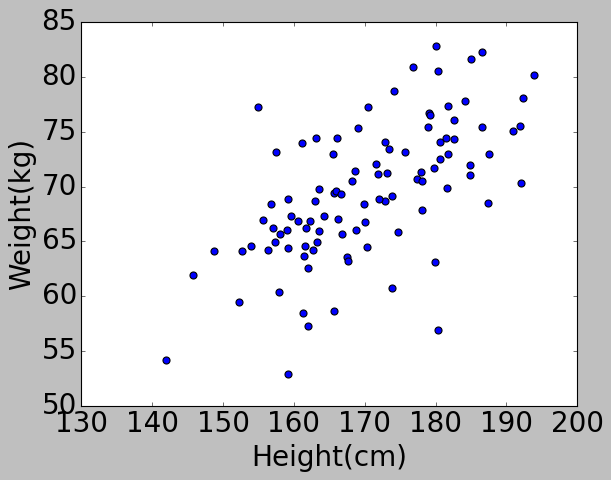

In [66]:
plt.rcParams["font.size"] = 25
# 標本数
N = 100
# 身長の疑似データ生成
h_mean, h_sigma = 170, 10
h = np.random.normal(loc=h_mean, scale=h_sigma, size=N)
# 体重の疑似データ生成
beta_0, beta_1 = 10, 0.35
epsilon_sigma = 5
w = beta_0 + beta_1 * h + np.random.normal(loc=0, scale=epsilon_sigma
, size=N)
print(w.shape, h.shape)

# 描画
plt.scatter(h, w, s=40, marker='o')
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')


In [67]:
# Linear Regression models
# x= height, y= weight
X= sm.add_constant(h)
y= w
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     61.94
Date:                Sun, 15 May 2022   Prob (F-statistic):           4.80e-12
Time:                        16:58:00   Log-Likelihood:                -299.78
No. Observations:                 100   AIC:                             603.6
Df Residuals:                      98   BIC:                             608.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3149      7.409      1.527      0.1

In [68]:
res.params

array([11.31493764,  0.34170373])

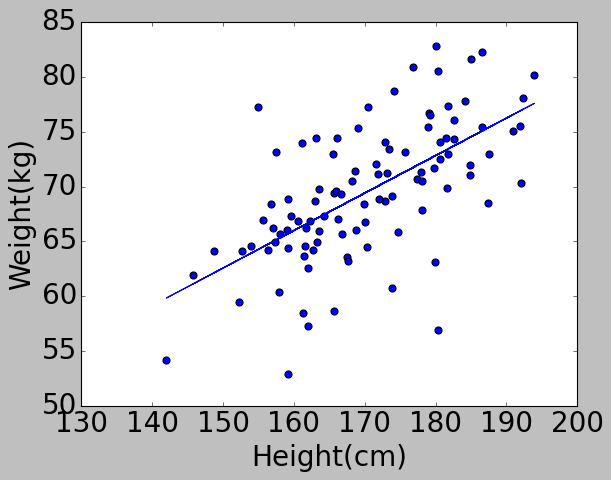

In [60]:
# 描画
# 疑似データ
plt.scatter(h, w, s=40, marker='o')
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')
# Linear Regression line
plt.plot(h, res.fittedvalues, label='Linear Regression Line')
# add error term on the LR line
# plt.fill_between(
#     h, y1=res.fittedvalues+1, y2=res.fittedvalues-1, color='#888888', 
#     alpha=0.4
# )
# add model formula in figure
# plt.text(x=170, y=60, 
#     s='weight = {:.3f} + {:.3f} * height + epsilon'
# .format(res.params[0], res.params[1]),
# ha='center')


# The case of Confounding


(100,) (100,) (100,)


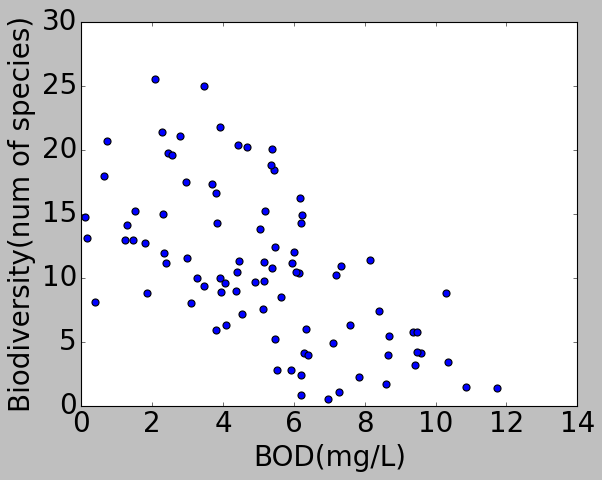

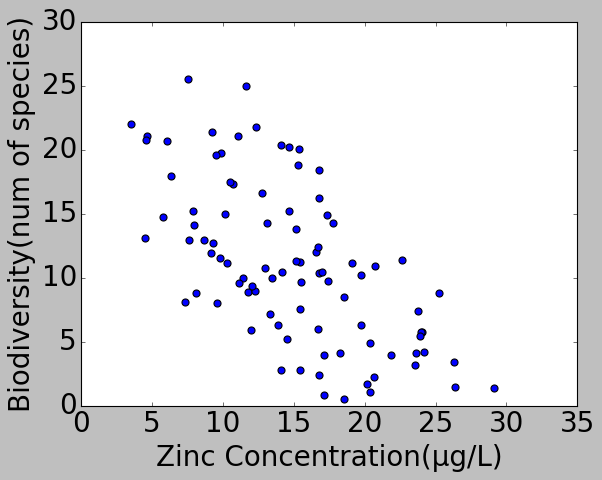

In [61]:
plt.rcParams["font.size"] = 25

# 疑似データ生成
# BOD濃度
np.random.seed(0)
BOD =np.random.normal(loc=Config.BOD_mean,
scale=Config.BOD_sigma,
size=Config.N)

# Biodiversity
biodiversity = (Config.biodiversity_beta_0 
+ Config.biodiversity_beta_1 * BOD 
+ np.random.normal(loc=0, scale=Config.biodiversity_sigma
, size=N)
)

# zinc concentration
zinc = (Config.zinc_beta_0
+ Config.zinc_beta_1*BOD 
+ np.random.normal(loc=0, scale=Config.zinc_sigma, size=N)
)

# check the array size
print(BOD.shape, biodiversity.shape, zinc.shape)

# scatter plot of each two factors
plt.scatter(BOD, biodiversity, s=40, marker='o')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('BOD(mg/L)')
plt.ylabel('Biodiversity(num of species)')
plt.show()

plt.scatter(zinc, biodiversity, s=40, marker='o')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('Zinc Concentration(μg/L)')
plt.ylabel('Biodiversity(num of species)')
plt.show()


## zinc-biodiversity

In [62]:
# Linear Regression models
# x= height, y= weight
X= sm.add_constant(zinc)
y= biodiversity
model = sm.OLS(y, X)
res_only_zinc_correlation = model.fit()
print(res_only_zinc_correlation.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     102.5
Date:                Sun, 15 May 2022   Prob (F-statistic):           6.51e-17
Time:                        16:57:59   Log-Likelihood:                -307.67
No. Observations:                 100   AIC:                             619.3
Df Residuals:                      98   BIC:                             624.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3100      1.413     16.499      0.0

biodiversity = 23.31 + -0.87 * zinc + epsilon


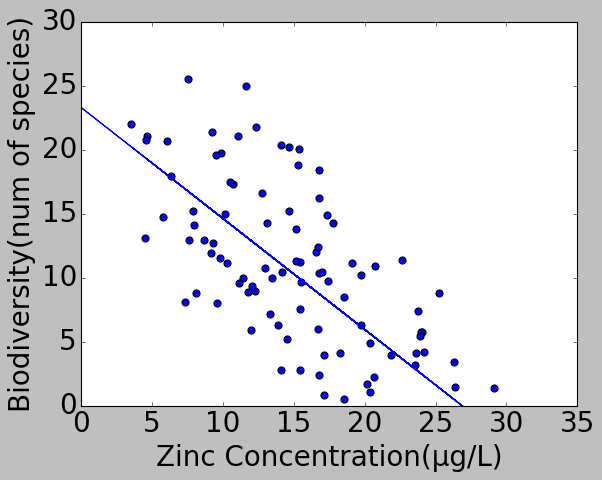

In [63]:
# 描画
res = res_only_zinc_correlation
# 疑似データ
plt.scatter(zinc, biodiversity, s=40, marker='o')
# Linear Regression line
plt.plot(zinc, res.fittedvalues, label='Linear Regression Line')

plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('Zinc Concentration(μg/L)')
plt.ylabel('Biodiversity(num of species)')

# plt.text(x=10, y=30, 
#     s='biodiversity = {:.3f} + {:.3f} * zinc + epsilon'
# .format(res.params[0], res.params[1]),
# )
print('biodiversity = {:.2f} + {:.2f} * zinc + epsilon'
.format(res.params[0], res.params[1]))

## BOD-biodiversity

In [69]:
# Linear Regression models
# x= height, y= weight
X= sm.add_constant(BOD)
y= biodiversity
model = sm.OLS(y, X)
res_BOD_biodiversity = model.fit()
print(res_BOD_biodiversity.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     110.9
Date:                Sun, 15 May 2022   Prob (F-statistic):           8.52e-18
Time:                        16:58:28   Log-Likelihood:                -305.62
No. Observations:                 100   AIC:                             615.2
Df Residuals:                      98   BIC:                             620.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.4199      1.030     18.853      0.0

biodiversity = 19.42 + -1.81 * BOD + epsilon


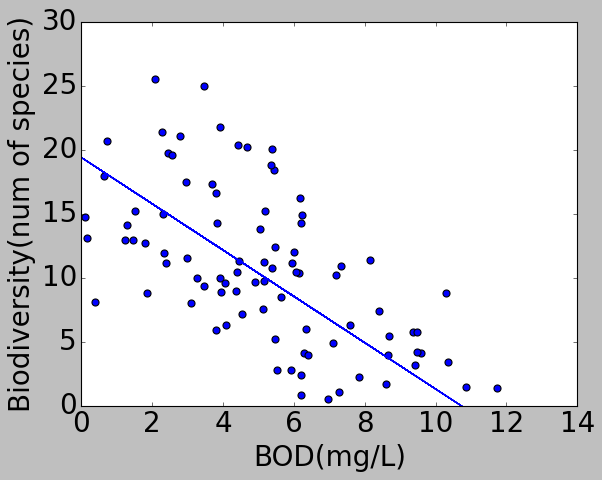

In [71]:
# 描画
res = res_BOD_biodiversity
# 疑似データ
plt.scatter(BOD, biodiversity, s=40, marker='o')
# Linear Regression line
plt.plot(BOD, res.fittedvalues, label='Linear Regression Line')

plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('BOD(mg/L)')
plt.ylabel('Biodiversity(num of species)')

print('biodiversity = {:.2f} + {:.2f} * BOD + epsilon'
.format(res.params[0], res.params[1]))

## Zinc-biodiversity considering BOD

In [72]:
# Linear Regression models
X = np.column_stack(tup=(zinc, BOD))
X= sm.add_constant(X)
y= biodiversity
model = sm.OLS(y, X)
res_Zinc_BOD_biodiversity = model.fit()
print(res_Zinc_BOD_biodiversity.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     55.13
Date:                Sun, 15 May 2022   Prob (F-statistic):           1.02e-16
Time:                        17:02:52   Log-Likelihood:                -305.50
No. Observations:                 100   AIC:                             617.0
Df Residuals:                      97   BIC:                             624.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1686      2.841      6.396      0.0